In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sides of die
n_sides = 6

# Represent a die by using a numpy array
die = np.array([i for i in range(1, n_sides+1)])

die

array([1, 2, 3, 4, 5, 6])

In [3]:
# Roll the die 1000 times
n_rolls = 1000

# Save the result of each roll
attack_rolls = np.array([np.array([np.random.choice(die) for _ in range(n_rolls)]) for _ in range(3)])

defense_rolls = np.array([np.array([np.random.choice(die) for _ in range(n_rolls)]) for _ in range(2)])


In [4]:
#Sort rolls in descending order
attack_rolls = np.sort(attack_rolls, axis = 0)[::-1]

defense_rolls = np.sort(defense_rolls, axis = 0)[::-1]

In [5]:
#Compare the top two attack and defense rolls
bool_idx_row1 = (attack_rolls[0]>defense_rolls[0])

bool_idx_row2 = (attack_rolls[1]>defense_rolls[1])


In [6]:
#Define function to count results
def results(match_1, match_2):
    attack_wins = 0
    defense_wins = 0

    for i in match_1:
        if i == True:
            attack_wins += 1
        else:
            defense_wins += 1

    for i in match_2:
        if i == True:
            attack_wins += 1
        else:
            defense_wins += 1

    fig, ax = plt.subplots()
    ax.bar("Attack Wins", attack_wins, width=.8, edgecolor="white", linewidth=0.7, color = "magenta")
    ax.bar("Defense Wins", defense_wins, width=.8, edgecolor="white", linewidth=0.7, color = "lightgreen")
    plt.title("Results of 1000 battle rounds (Risk)")
    plt.show()

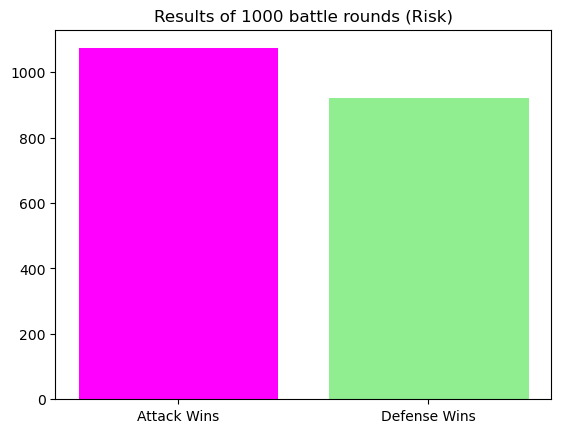

In [7]:
results(bool_idx_row1, bool_idx_row2)

In [8]:
#Define a function to similulate results of battle between attacking and defending army until one army is depleted
def results_war(attacking_army, defending_army):
    attack_wins_war = 0
    defense_wins_war = 0

    attacking_army_start = attacking_army
    defending_army_start = defending_army

    while attacking_army > 0 and defending_army > 0:
        attack_rolls_war = [np.random.choice(die) for _ in range(3)]
        defense_rolls_war = [np.random.choice(die) for _ in range(2)]

        attack_rolls_war = np.sort(attack_rolls_war, axis = 0)[::-1]
        defense_rolls_war = np.sort(defense_rolls_war, axis = 0)[::-1]
    
        bool_idx_row1_war = (attack_rolls_war[0]>defense_rolls_war[0])
        bool_idx_row2_war = (attack_rolls_war[1]>defense_rolls_war[1])

        if bool_idx_row1_war == True:
            attack_wins_war += 1
            defending_army -= 1
        else:
            defense_wins_war += 1
            attacking_army -= 1
        
        if attacking_army <= 0 or defending_army <= 0:
            break
        
        elif bool_idx_row2_war == True:
            attack_wins_war += 1
            defending_army -= 1
        else:
            defense_wins_war += 1
            attacking_army -= 1
     
    #Barplot of win count
    fig, ax = plt.subplots()
    ax.bar("Attack Wins", attack_wins_war, width=.8, edgecolor="white", linewidth=0.7, color = "magenta")
    ax.bar("Defense Wins", defense_wins_war, width=.8, edgecolor="white", linewidth=0.7, color = "lightgreen")
    ax.set_ylabel('Win count', color = "black")

    #Add lines to show decline in army numbers
    ax2 = ax.twinx()
    color = 'tab:cyan'

    attacking_army_decline = (attacking_army_start, attacking_army)
    defending_army_decline = (defending_army_start, defending_army)

    if attacking_army_start >= defending_army_start:
        ylim = attacking_army_start
    else:
        ylim = defending_army_start
    ax2.set_ylim(0, ylim)

    ax2.set_ylabel('Troop numbers', color = color) 

    line1, = ax2.plot((-.5,1.5), attacking_army_decline, color = color, label = "Attacking Army") 
    line2, = ax2.plot((-.5,1.5), defending_army_decline, color = color, linestyle = "dotted", label = "Defending Army")
    ax.legend(handles = [line1, line2])
    ax2.tick_params(axis ='y', labelcolor = color)
    

    plt.title("Results of total war between two armies (Risk)")
    plt.show()


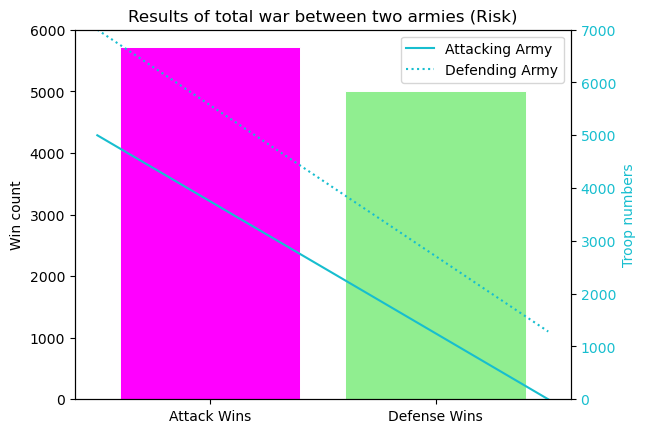

In [10]:
results_war(5000,7000)